# importing libraries 

In [97]:
import os    # for finding if any file is actually present in a particular folder
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings ('ignore')

# database connection

In [2]:
connection = sqlite3.connect('travel.sqlite')
cursor = connection.cursor()   # for executing sql queries

# list of tables

In [3]:
cursor.execute("""select * from sqlite_master where type = 'table';""")    # sqlite_master is a metadata which helds all data from main database temporarily
table_list = [table[1] for table in cursor.fetchall()]  # 'list comprehension' which executes all the table name in one line

print('List of all tables present in the database: \n', )
for table in table_list:
   print(table)
#table_list

List of all tables present in the database: 

aircrafts_data
airports_data
boarding_passes
bookings
flights
seats
ticket_flights
tickets


# data exploration 

In [4]:
aircrafts_data = pd.read_sql_query("select * from aircrafts_data", connection)
(aircrafts_data)




,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


In [5]:
aircrafts_data.shape   # total no of rows,columns

(9, 3)

In [6]:
airports_data = pd.read_sql_query("select * from airports_data", connection)
(airports_data)


,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,"{""en"": ""Murmansk Airport"", ""ru"": ""Мурманск""}","{""en"": ""Murmansk"", ""ru"": ""Мурманск""}","(32.7508010864257812,68.7817001342773438)",Europe/Moscow
100,ABA,"{""en"": ""Abakan Airport"", ""ru"": ""Абакан""}","{""en"": ""Abakan"", ""ru"": ""Абакан""}","(91.3850021362304688,53.7400016784667969)",Asia/Krasnoyarsk
101,BAX,"{""en"": ""Barnaul Airport"", ""ru"": ""Барнаул""}","{""en"": ""Barnaul"", ""ru"": ""Барнаул""}","(83.5384979248046875,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,"{""en"": ""Anapa Vityazevo Airport"", ""ru"": ""Витяз...","{""en"": ""Anapa"", ""ru"": ""Анапа""}","(37.3473014831539984,45.002101898192997)",Europe/Moscow


In [7]:
airports_data.head()

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin


In [8]:
airports_data.shape

(104, 5)

In [9]:
boarding_passes= pd.read_sql_query("select * from boarding_passes", connection)
(boarding_passes)

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A
...,...,...,...,...
579681,0005434302871,19945,85,20F
579682,0005432892791,19945,86,21C
579683,0005434302869,19945,87,20E
579684,0005432802476,19945,88,21F


In [10]:
boarding_passes.head()

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A


In [11]:
boarding_passes.shape

(579686, 4)

In [12]:
bookings = pd.read_sql_query("select * from bookings ", connection)
(bookings ) 

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


In [13]:
bookings.head()

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600


In [14]:
bookings .shape

(262788, 3)

In [15]:
flights = pd.read_sql_query("select * from flights", connection)
(flights)

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03
33118,33119,PG0063,2017-09-08 19:25:00+03,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N
33119,33120,PG0063,2017-08-01 19:25:00+03,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03


In [16]:
flights.head()

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


In [17]:
flights.shape

(33121, 10)

In [18]:
seats = pd.read_sql_query("select * from seats", connection)
(seats)

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [19]:
seats.head()

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business


In [20]:
seats.shape

(1339, 3)

In [21]:
ticket_flights = pd.read_sql_query("select * from ticket_flights ", connection)
(ticket_flights )

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100
...,...,...,...,...
1045721,0005435097522,32094,Economy,5200
1045722,0005435097521,32094,Economy,5200
1045723,0005435104384,32094,Economy,5200
1045724,0005435104352,32094,Economy,5200


In [22]:
ticket_flights.head()

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100


In [23]:
ticket_flights .shape


(1045726, 4)

In [24]:
tickets = pd.read_sql_query("select * from tickets ", connection)
(tickets )

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589
...,...,...,...
366728,0005435999869,D730BA,0474 690760
366729,0005435999870,D730BA,6535 751108
366730,0005435999871,A1AD46,1596 156448
366731,0005435999872,7B6A53,9374 822707


In [25]:
tickets.head()

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589


In [26]:
tickets.shape

(366733, 3)

In [27]:
for table in table_list:
    print("\ntable:",table)
    coulmn_info = connection.execute("PRAGMA table_info({})".format(table))
    for column in coulmn_info.fetchall():
       print(column[:3])


table: aircrafts_data
(0, 'aircraft_code', 'character(3)')
(1, 'model', 'jsonb')
(2, 'range', 'INTEGER')

table: airports_data
(0, 'airport_code', 'character(3)')
(1, 'airport_name', 'jsonb')
(2, 'city', 'jsonb')
(3, 'coordinates', 'point')
(4, 'timezone', 'TEXT')

table: boarding_passes
(0, 'ticket_no', 'character(13)')
(1, 'flight_id', 'INTEGER')
(2, 'boarding_no', 'INTEGER')
(3, 'seat_no', 'character varying(4)')

table: bookings
(0, 'book_ref', 'character(6)')
(1, 'book_date', 'timestamp with time zone')
(2, 'total_amount', 'numeric(10,2)')

table: flights
(0, 'flight_id', 'INTEGER')
(1, 'flight_no', 'character(6)')
(2, 'scheduled_departure', 'timestamp with time zone')
(3, 'scheduled_arrival', 'timestamp with time zone')
(4, 'departure_airport', 'character(3)')
(5, 'arrival_airport', 'character(3)')
(6, 'status', 'character varying(20)')
(7, 'aircraft_code', 'character(3)')
(8, 'actual_departure', 'timestamp with time zone')
(9, 'actual_arrival', 'timestamp with time zone')

tabl

# to check if any column has any null value in table

In [28]:
for table in table_list:
    print("\ntable: ",table)
    df_table = pd.read_sql_query(f"select * from {table}",connection)
    print(df_table.isnull().sum())
    


table:  aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

table:  airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

table:  boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

table:  bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

table:  flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

table:  seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

table:  ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

table:  tickets
ticket_no       0
book_ref        0
passenger_id    0
dtype: int64


# data analysis

**how many aircrafts have more than 100 seats?**

In [34]:
pd.read_sql_query("""select aircraft_code,count(*) as no_of_seats from seats group by aircraft_code having no_of_seats>100""",connection)



,aircraft_code,no_of_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


##### **how the number of tickets booked and total amount earned changed with the time**

In [56]:
 pd.read_sql_query("""select * from tickets inner join bookings on tickets.book_ref=bookings.book_ref """,connection)



,ticket_no,book_ref,passenger_id,book_ref,book_date,total_amount
0,0005432000987,06B046,8149 604011,06B046,2017-07-05 20:19:00+03,12400
1,0005432000988,06B046,8499 420203,06B046,2017-07-05 20:19:00+03,12400
2,0005432000989,E170C3,1011 752484,E170C3,2017-06-29 01:55:00+03,24700
3,0005432000990,E170C3,4849 400049,E170C3,2017-06-29 01:55:00+03,24700
4,0005432000991,F313DD,6615 976589,F313DD,2017-07-03 04:37:00+03,30900
...,...,...,...,...,...,...
366728,0005435999869,D730BA,0474 690760,D730BA,2017-08-14 11:50:00+03,210600
366729,0005435999870,D730BA,6535 751108,D730BA,2017-08-14 11:50:00+03,210600
366730,0005435999871,A1AD46,1596 156448,A1AD46,2017-08-13 03:49:00+03,45900
366731,0005435999872,7B6A53,9374 822707,7B6A53,2017-08-15 15:54:00+03,219400


In [57]:
tickets = pd.read_sql_query("""select * from tickets inner join bookings on tickets.book_ref=bookings.book_ref """,connection)
tickets.dtypes

ticket_no       object
book_ref        object
passenger_id    object
book_ref        object
book_date       object
total_amount     int64
dtype: object

In [59]:
tickets['book_date']=pd.to_datetime(tickets['book_date'])
tickets

,ticket_no,book_ref,passenger_id,book_ref,book_date,total_amount
0,0005432000987,06B046,8149 604011,06B046,2017-07-05 20:19:00+03:00,12400
1,0005432000988,06B046,8499 420203,06B046,2017-07-05 20:19:00+03:00,12400
2,0005432000989,E170C3,1011 752484,E170C3,2017-06-29 01:55:00+03:00,24700
3,0005432000990,E170C3,4849 400049,E170C3,2017-06-29 01:55:00+03:00,24700
4,0005432000991,F313DD,6615 976589,F313DD,2017-07-03 04:37:00+03:00,30900
...,...,...,...,...,...,...
366728,0005435999869,D730BA,0474 690760,D730BA,2017-08-14 11:50:00+03:00,210600
366729,0005435999870,D730BA,6535 751108,D730BA,2017-08-14 11:50:00+03:00,210600
366730,0005435999871,A1AD46,1596 156448,A1AD46,2017-08-13 03:49:00+03:00,45900
366731,0005435999872,7B6A53,9374 822707,7B6A53,2017-08-15 15:54:00+03:00,219400


In [60]:
tickets.dtypes

ticket_no                          object
book_ref                           object
passenger_id                       object
book_ref                           object
book_date       datetime64[ns, UTC+03:00]
total_amount                        int64
dtype: object

In [63]:
tickets['date'] = (tickets['book_date']).dt.date
tickets

,ticket_no,book_ref,passenger_id,book_ref,book_date,total_amount,date
0,0005432000987,06B046,8149 604011,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
1,0005432000988,06B046,8499 420203,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
2,0005432000989,E170C3,1011 752484,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
3,0005432000990,E170C3,4849 400049,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
4,0005432000991,F313DD,6615 976589,F313DD,2017-07-03 04:37:00+03:00,30900,2017-07-03
...,...,...,...,...,...,...,...
366728,0005435999869,D730BA,0474 690760,D730BA,2017-08-14 11:50:00+03:00,210600,2017-08-14
366729,0005435999870,D730BA,6535 751108,D730BA,2017-08-14 11:50:00+03:00,210600,2017-08-14
366730,0005435999871,A1AD46,1596 156448,A1AD46,2017-08-13 03:49:00+03:00,45900,2017-08-13
366731,0005435999872,7B6A53,9374 822707,7B6A53,2017-08-15 15:54:00+03:00,219400,2017-08-15


##### **total no of tickets**

In [66]:
tickets.groupby('date')[['date']].count()

,date
date,
2017-06-21,6
2017-06-22,12
2017-06-23,28
2017-06-24,106
2017-06-25,266
2017-06-26,499
2017-06-27,1028
2017-06-28,1678
2017-06-29,2765


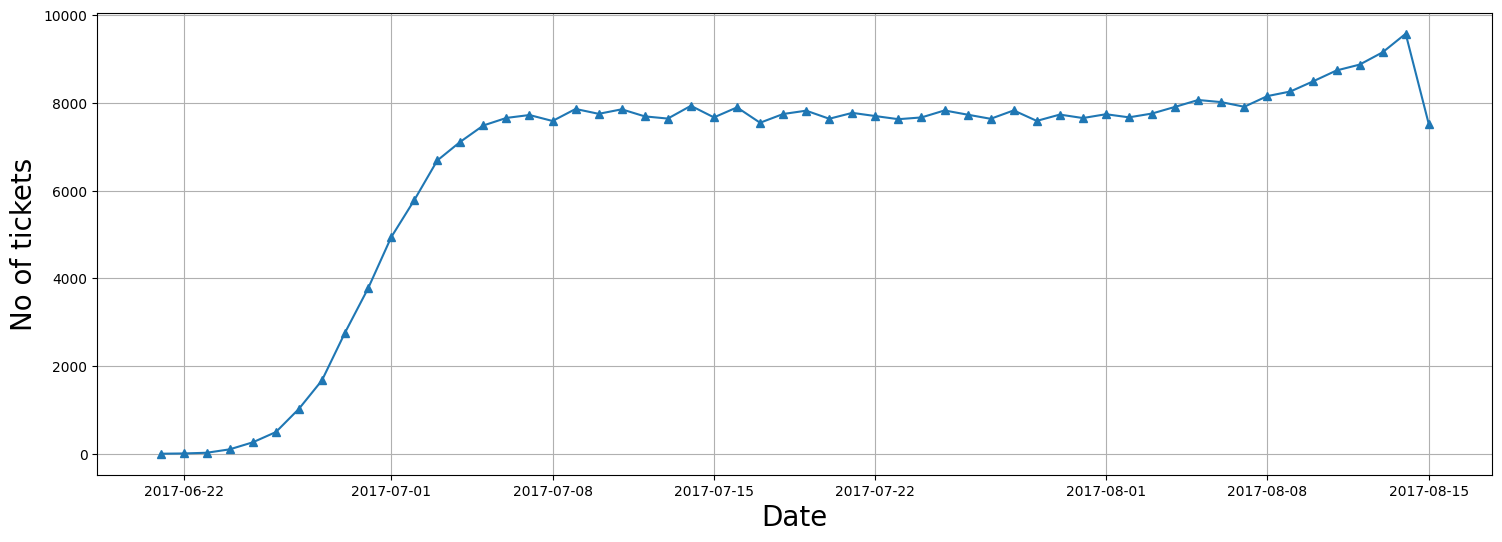

In [75]:
x = tickets.groupby('date')[['date']].count()
plt.figure(figsize=(18,6))
plt.plot(x.index,x['date'],marker = '^')
plt.xlabel('Date',fontsize= 20)
plt.ylabel('No of tickets',fontsize= 20)
plt.grid("b")
plt.show()

In [78]:
bookings = pd.read_sql_query("""select * from bookings""",connection)
(bookings )

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


In [81]:
bookings = pd.read_sql_query("""select * from bookings""",connection)
bookings.dtypes


book_ref        object
book_date       object
total_amount     int64
dtype: object

In [82]:
bookings['book_date']=pd.to_datetime(bookings['book_date'])
bookings

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03:00,265700
1,000012,2017-07-14 09:02:00+03:00,37900
2,000068,2017-08-15 14:27:00+03:00,18100
3,000181,2017-08-10 13:28:00+03:00,131800
4,0002D8,2017-08-07 21:40:00+03:00,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03:00,56000
262784,FFFF2C,2017-08-08 05:55:00+03:00,10800
262785,FFFF43,2017-07-20 20:42:00+03:00,78500
262786,FFFFA8,2017-08-08 04:45:00+03:00,28800


In [83]:
bookings.dtypes

book_ref                           object
book_date       datetime64[ns, UTC+03:00]
total_amount                        int64
dtype: object

In [84]:
bookings['date'] = (bookings['book_date']).dt.date
bookings

,book_ref,book_date,total_amount,date
0,00000F,2017-07-05 03:12:00+03:00,265700,2017-07-05
1,000012,2017-07-14 09:02:00+03:00,37900,2017-07-14
2,000068,2017-08-15 14:27:00+03:00,18100,2017-08-15
3,000181,2017-08-10 13:28:00+03:00,131800,2017-08-10
4,0002D8,2017-08-07 21:40:00+03:00,23600,2017-08-07
...,...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03:00,56000,2017-07-17
262784,FFFF2C,2017-08-08 05:55:00+03:00,10800,2017-08-08
262785,FFFF43,2017-07-20 20:42:00+03:00,78500,2017-07-20
262786,FFFFA8,2017-08-08 04:45:00+03:00,28800,2017-08-08


In [87]:
bookings.groupby('date')[['total_amount']].sum()


,total_amount
date,
2017-06-21,441900
2017-06-22,775300
2017-06-23,1822000
2017-06-24,5977000
2017-06-25,15305400
2017-06-26,29049100
2017-06-27,54339900
2017-06-28,91256400
2017-06-29,152484000


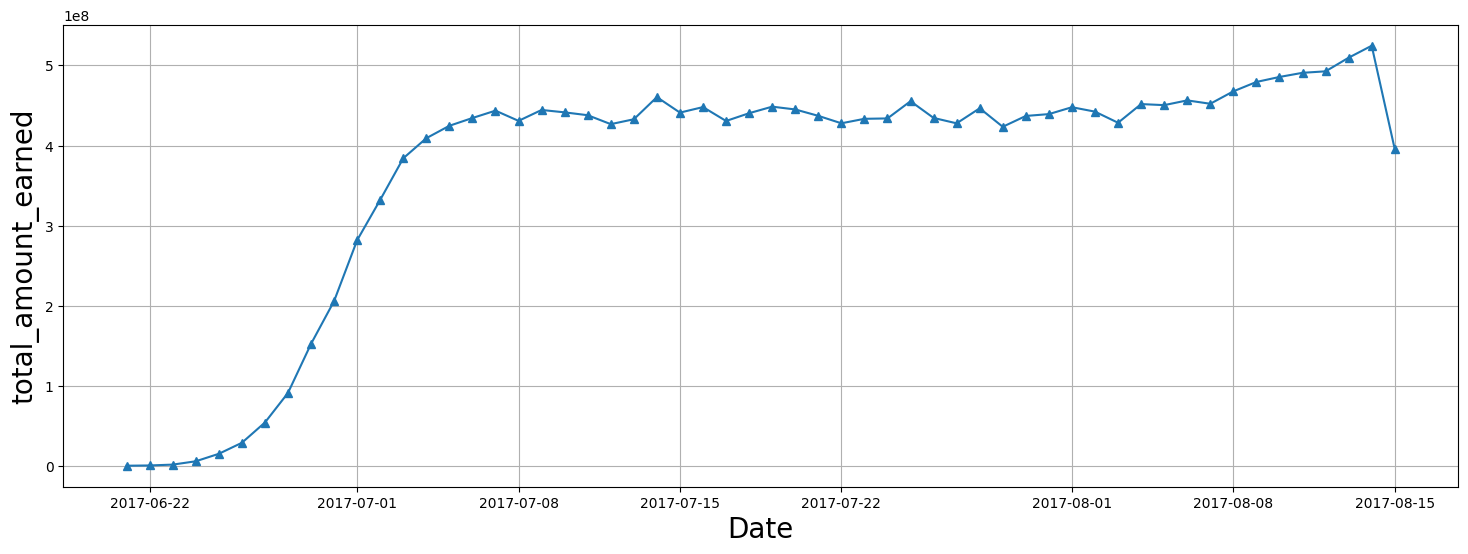

In [93]:

y = bookings.groupby('date')[['total_amount']].sum()
plt.figure(figsize=(18,6))
plt.plot(y.index,y[['total_amount']],marker = '^')
plt.xlabel('Date',fontsize= 20)
plt.ylabel('total_amount_earned',fontsize= 20)
plt.grid("b")
plt.show()

##### **calculate the average charges for each aircraft with fare conditions**

In [94]:
df= pd.read_sql_query("""select * from ticket_flights join flights on ticket_flights.flight_id = flights.flight_id """,connection)
df

,ticket_no,flight_id,fare_conditions,amount,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,0005432159776,30625,Business,42100,30625,PG0013,2017-07-16 18:15:00+03,2017-07-16 20:00:00+03,AER,SVO,Arrived,773,2017-07-16 18:18:00+03,2017-07-16 20:04:00+03
1,0005435212351,30625,Business,42100,30625,PG0013,2017-07-16 18:15:00+03,2017-07-16 20:00:00+03,AER,SVO,Arrived,773,2017-07-16 18:18:00+03,2017-07-16 20:04:00+03
2,0005435212386,30625,Business,42100,30625,PG0013,2017-07-16 18:15:00+03,2017-07-16 20:00:00+03,AER,SVO,Arrived,773,2017-07-16 18:18:00+03,2017-07-16 20:04:00+03
3,0005435212381,30625,Business,42100,30625,PG0013,2017-07-16 18:15:00+03,2017-07-16 20:00:00+03,AER,SVO,Arrived,773,2017-07-16 18:18:00+03,2017-07-16 20:04:00+03
4,0005432211370,30625,Business,42100,30625,PG0013,2017-07-16 18:15:00+03,2017-07-16 20:00:00+03,AER,SVO,Arrived,773,2017-07-16 18:18:00+03,2017-07-16 20:04:00+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045721,0005435097522,32094,Economy,5200,32094,PG0708,2017-09-14 17:15:00+03,2017-09-14 18:00:00+03,SGC,OVS,Scheduled,733,\N,\N
1045722,0005435097521,32094,Economy,5200,32094,PG0708,2017-09-14 17:15:00+03,2017-09-14 18:00:00+03,SGC,OVS,Scheduled,733,\N,\N
1045723,0005435104384,32094,Economy,5200,32094,PG0708,2017-09-14 17:15:00+03,2017-09-14 18:00:00+03,SGC,OVS,Scheduled,733,\N,\N
1045724,0005435104352,32094,Economy,5200,32094,PG0708,2017-09-14 17:15:00+03,2017-09-14 18:00:00+03,SGC,OVS,Scheduled,733,\N,\N


In [96]:
df = pd.read_sql_query("""select aircraft_code, fare_conditions, avg(amount)
from ticket_flights join flights on ticket_flights.flight_id = flights.flight_id 
group by aircraft_code,fare_conditions """,connection)
df


,aircraft_code,fare_conditions,avg(amount)
0,319,Business,113550.557703
1,319,Economy,38311.402347
2,321,Business,34435.662664
3,321,Economy,11534.974764
4,733,Business,41865.626175
5,733,Economy,13985.152000
6,763,Business,82839.842866
7,763,Economy,27594.721829
8,773,Business,57779.909435
9,773,Comfort,32740.552889


<Axes: xlabel='aircraft_code', ylabel='avg(amount)'>

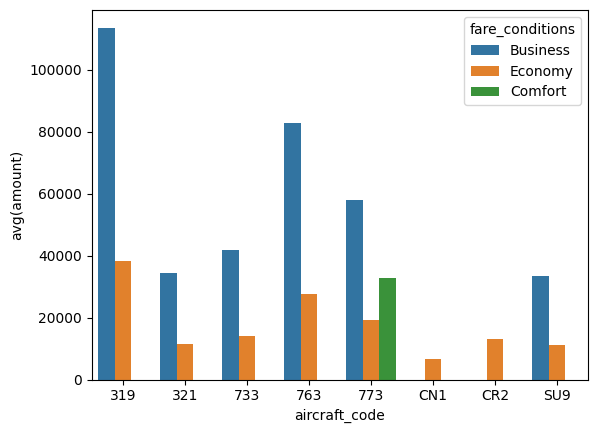

In [105]:
sns.barplot(data = df, x = 'aircraft_code', y = 'avg(amount)', hue= 'fare_conditions')

# Analyzing occupancy rate

 ##### **for each aircraft calculate the total revenue per year and the average revenue per ticket**

In [110]:
pd.read_sql_query("""select aircraft_code,ticket_count,total_revenue,total_revenue/ticket_count as avg_revenue_per_ticket from
          (select aircraft_code, count(*) as ticket_count, sum(amount)as total_revenue 
          from ticket_flights join flights on ticket_flights.flight_id = flights.flight_id group by aircraft_code)""",connection)

,aircraft_code,ticket_count,total_revenue,avg_revenue_per_ticket
0,319,52853,2706163100,51201
1,321,107129,1638164100,15291
2,733,86102,1426552100,16568
3,763,124774,4371277100,35033
4,773,144376,3431205500,23765
5,CN1,14672,96373800,6568
6,CR2,150122,1982760500,13207
7,SU9,365698,5114484700,13985


##### **calculate average occupancy per aircraft**

In [113]:
pd.read_sql_query("""select aircraft_code,boarding_passes.flight_id,count(*) as seat_counts
from boarding_passes inner join flights on boarding_passes.flight_id = flights.flight_id
group by aircraft_code,boarding_passes.flight_id""",connection)

,aircraft_code,flight_id,seat_counts
0,319,1162,51
1,319,1166,54
2,319,1167,57
3,319,1168,60
4,319,1170,58
...,...,...,...
11513,SU9,32925,12
11514,SU9,32928,25
11515,SU9,32931,12
11516,SU9,32933,16


In [118]:
pd.read_sql_query("""select aircraft_code,count(*) as num_seats from seats group by aircraft_code""",connection)

,aircraft_code,num_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402
6,CN1,12
7,CR2,50
8,SU9,97


In [141]:
 pd.read_sql_query("""select a.aircraft_code,avg(a.seat_counts)as booked_seats,b.num_seats, avg(a.seat_counts)/b.num_seats as occupancy_rate from
(select aircraft_code,boarding_passes.flight_id,count(*) as seat_counts
from boarding_passes inner join flights on boarding_passes.flight_id = flights.flight_id
group by aircraft_code,boarding_passes.flight_id)as a 
inner join(select aircraft_code,count(*) as num_seats from seats group by aircraft_code) as b 
on a.aircraft_code = b.aircraft_code group by b.aircraft_code""",connection)

,aircraft_code,booked_seats,num_seats,occupancy_rate
0,319,53.583181,116,0.461924
1,321,88.809231,170,0.522407
2,733,80.255462,130,0.617350
3,763,113.937294,222,0.513231
4,773,264.925806,402,0.659019
5,CN1,6.004431,12,0.500369
6,CR2,21.482847,50,0.429657
7,SU9,56.812113,97,0.585692


In [168]:
occupancy_rate = pd.read_sql_query("""select a.aircraft_code,avg(a.seat_counts)as booked_seats,b.num_seats, avg(a.seat_counts)/b.num_seats as occupancy_rate from
(select aircraft_code,boarding_passes.flight_id,count(*) as seat_counts
from boarding_passes inner join flights on boarding_passes.flight_id = flights.flight_id
group by aircraft_code,boarding_passes.flight_id)as a 
inner join(select aircraft_code,count(*) as num_seats from seats group by aircraft_code) as b 
on a.aircraft_code = b.aircraft_code group by b.aircraft_code""",connection)
occupancy_rate


,aircraft_code,booked_seats,num_seats,occupancy_rate
0,319,53.58318098720292,116,0.46192397402761143
1,321,88.80923076923077,170,0.5224072398190045
2,733,80.25546218487395,130,0.617349709114415
3,763,113.93729372937294,222,0.5132310528350132
4,773,264.9258064516129,402,0.659019419033863
5,CN1,6.004431314623338,12,0.5003692762186115
6,CR2,21.48284690220174,50,0.42965693804403476
7,SU9,56.81211267605634,97,0.5856918832583128


###### **calculate by how much the total annual turnover could increase by giving all aircraft a 10% higher occupancy rate**

In [159]:
occupancy_rate['increased_occupancy_rate'] = occupancy_rate['occupancy_rate']+occupancy_rate['occupancy_rate']*.10
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,increased_occupancy_rate
0,319,53.583181,116,0.461924,0.508116
1,321,88.809231,170,0.522407,0.574648
2,733,80.255462,130,0.617350,0.679085
3,763,113.937294,222,0.513231,0.564554
4,773,264.925806,402,0.659019,0.724921
5,CN1,6.004431,12,0.500369,0.550406
6,CR2,21.482847,50,0.429657,0.472623
7,SU9,56.812113,97,0.585692,0.644261


In [164]:
total_revenue = pd.read_sql_query("""select aircraft_code,sum(amount) as total_revenue from 
ticket_flights join flights on ticket_flights.flight_id=flights.flight_id group by aircraft_code""",connection)
total_revenue

,aircraft_code,total_revenue
0,319,2706163100
1,321,1638164100
2,733,1426552100
3,763,4371277100
4,773,3431205500
5,CN1,96373800
6,CR2,1982760500
7,SU9,5114484700


In [166]:
pd.set_option('display.float_format',str)

In [167]:
occupancy_rate['increased_total_annual_turnover'] = (total_revenue['total_revenue']/occupancy_rate['occupancy_rate'])*occupancy_rate['increased_occupancy_rate']
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,increased_occupancy_rate,increased_total_annual_turnover
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726,2976779410.0
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905,1801980510.0
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565,1569207310.0000002
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146,4808404810.0
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492,3774326050.0
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727,106011180.00000001
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382,2181036550.0
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144,5625933169.999999
